# Three Layers Neural Network (MNIST DataSet)

In [1]:
# Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from sklearn.preprocessing import LabelBinarizer

train_filename = "DataSets\MNIST_train.csv"
test_filename = "DataSets\MNIST_test.csv"

In [2]:
# Loading and Preprocessing the data
def preprocessing(filename):
    dataset = pd.read_csv(filename, header=0)
    data = dataset.values
    x = data[:,1:] / 255 # Normalize each pixels to Grayscale 0 to 1
    y = data[:,0]
    
    lb = LabelBinarizer()
    lb.fit(y)
    y = lb.transform(y)
    
    return x, y

In [3]:
# Loading the training dataset
trainX, trainY = preprocessing(train_filename)

# Loading the test dataset
testX, testY = preprocessing(test_filename)

In [4]:
# Select only 1000 training images
trainX = trainX[:1000]

In [76]:
# Nonlinear Function
def relu(inputs):
    return (inputs > 0) * inputs

# Direvative of the Nonlinear function
def relu2Direvative(output):
    return (output > 0)

In [94]:
np.random.seed(1)

# Neural Network Function
def NeuralNetwork(train, labels):
    
    np.random.seed(1) # Setting the random seed
    
    alpha = 0.005
    iterations = 500
    input_nodes = train.shape[1] # Image Pixels
    hidden_nodes = 40
    output_nodes = 10 # 0 to 9 Numbers
    num_samples = train.shape[0]
    
    weights_0_1 = 0.2 * np.random.random((input_nodes, hidden_nodes)) - 0.1
    weights_1_2 = 0.2 * np.random.random((hidden_nodes, output_nodes)) - 0.1
    
    errors = []
    
    for iteration in range(iterations):
        
        error = 0.0
        correct_cnt = 0
        for i in range(train.shape[0]):
            
            layer_0 = train[i:i+1]
            layer_1 = relu(layer_0.dot(weights_0_1))
            
            #dropout_mask = np.random.randint(2, size=layer_1.shape)
            #layer_1 *= dropout_mask * 2
            
            layer_2 = layer_1.dot(weights_1_2)
            
            error += np.sum((layer_2 - labels[i:i+1]) ** 2)
            correct_cnt += int(np.argmax(layer_2)) == np.argmax(labels[i:i+1])
            
            layer_2_delta = layer_2 - labels[i:i+1]
            layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2Direvative(layer_1)
            
            #layer_1_delta *= dropout_mask
            
            weights_1_2 -= layer_1.T.dot(layer_2_delta) * alpha
            weights_0_1 -= layer_0.T.dot(layer_1_delta) * alpha
        
        errors.append(error)
        sys.stdout.write("\r" + "Iteration: " + str(iteration) + " Error: " + str((error/num_samples)*100)[0:5] + "%" + " Correct Count: " + str(correct_cnt))
        
    return errors, weights_0_1, weights_1_2

In [112]:
# Plotting Function
def plot(data):
    ax = plt.figure(figsize=(10,6))
    ax.suptitle("Error Plot", fontsize=20)
    plt.plot(data)
    plt.xlabel("Iteration", fontsize=15)
    plt.ylabel("Error", fontsize=15)
    plt.show()

In [120]:
# Call Neural Network Function
errors, weights_0_1, weights_1_2 = NeuralNetwork(trainX, trainY)

Iteration: 499 Error: 0.440% Correct Count: 998

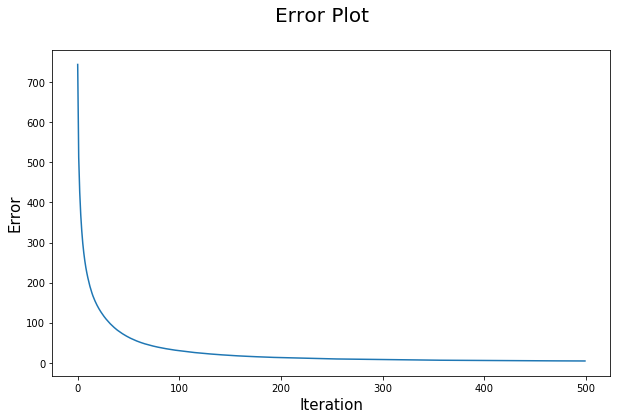

In [121]:
# Plotting Error Curve
plot(errors)

In [122]:
# Batch Gradient Descent Implementation

In [123]:
# Loading the training dataset
trainX, trainY = preprocessing(train_filename)

In [124]:
# Select only 1000 training images
trainX = trainX[:1000]

In [125]:
np.random.seed(1)

def RelU(inputs):
    return (inputs > 0 ) * inputs

def RelUDerivative(output):
    return (output > 0)

def NeuralNetworkWithBatch(XTrain, YTrain):
    
    alpha, iterations, batch_size, num_examples, input_nodes, hidden_nodes, output_nodes = 0.005, 500, 100, XTrain.shape[0], XTrain.shape[1], 300, YTrain.shape[1]
    
    weights_0_1 = 0.2 * np.random.random((input_nodes, hidden_nodes)) - 0.1
    weights_1_2 = 0.2 * np.random.random((hidden_nodes, output_nodes)) - 0.1
    
    errors = []
    
    for iteration in range(iterations):
        error, correct_cnt = 0.0, 0.0
        
        for i in range(int(num_examples / batch_size)):
            
            start_batch, end_batch = batch_size * i, batch_size * (i+1)
            layer_0 = XTrain[start_batch:end_batch]
            
            layer_1 = RelU(layer_0.dot(weights_0_1))
            dropout_mask = np.random.randint(2, size=layer_1.shape)
            layer_1 *= dropout_mask * 2
            
            layer_2 = layer_1.dot(weights_1_2)
            
            error += np.sum((layer_2 - YTrain[start_batch:end_batch]) ** 2)
            for k in range(batch_size):
                correct_cnt += int(np.argmax(layer_2[k:k+1])) == np.argmax(YTrain[start_batch:end_batch][k:k+1]) 
            
            layer_2_delta = (layer_2 - YTrain[start_batch:end_batch])
            layer_1_delta = (layer_2_delta.dot(weights_1_2.T) * RelUDerivative(layer_1))
            layer_1_delta *= dropout_mask
            
            weights_1_2 -= layer_1.T.dot(layer_2_delta) * alpha
            weights_0_1 -= layer_0.T.dot(layer_1_delta) * alpha
        
        errors.append(error)
        sys.stdout.write("\r" + "Iteration: " + str(iteration) + " Error: " + str((error / num_examples)*100)[0:4] + "%" + " Correct Count:" + str(correct_cnt))
        
    return errors, weights_0_1, weights_1_2

In [126]:
# Call Neural Network Function
errors, weights_0_1, weights_1_2 = NeuralNetworkWithBatch(trainX, trainY)

Iteration: 499 Error: 19.4% Correct Count:968.0

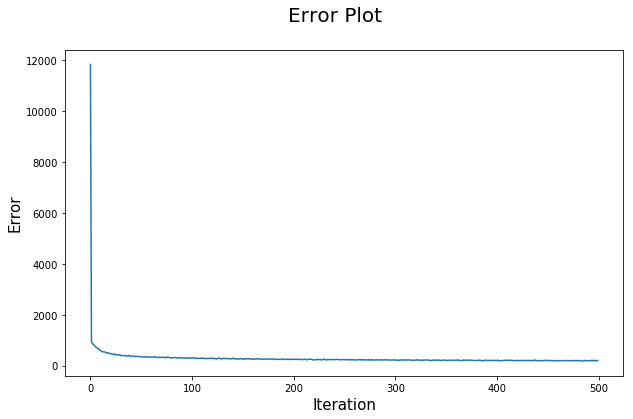

In [118]:
# Plotting Error Curve
plot(errors)